# Task 3 – Mean, median, and Gaussian filtering

In [16]:
%pylab
%matplotlib inline
import numpy as np

Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [18]:
s=0
for x in range(1,10):
    s =+ x
print(s)

9


---

## Task 3.1 – Linear filtering by convolution (mean filter)

**Task 3.1.1.** Load the image `data/lena.png` and show it:

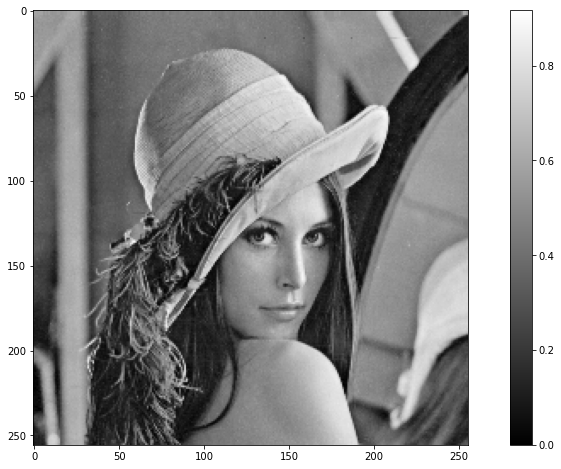

In [62]:
img = imread('data/lena.png')
figure(figsize(15,8))
imshow( img,'gray' )
colorbar()

**Task 3.1.2.** Implement a mean filter:

In [78]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in ndindex(img.shape):
        neighborhood_sum = 0
        if n <= p[0] and n<= p[1] and n + p[0]< img.shape[0] and n + p[1] < img.shape[1]:
            for q in ndindex(size, size):
                neighborhood_sum = neighborhood_sum + img[p[0]+q[0]-n,p[1]+q[1]-n]
        result[p]= neighborhood_sum/(size*size)
    
    return result

**Task 3.1.3.** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

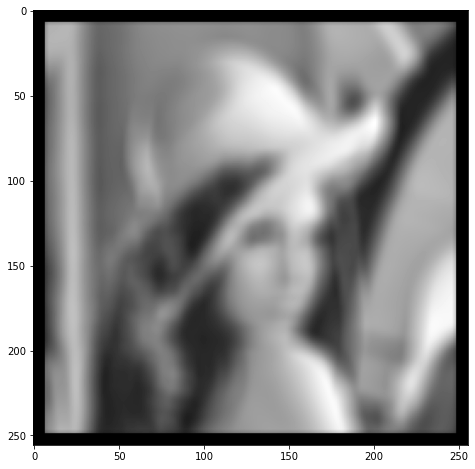

In [101]:
img2 = img.copy()
img9 = meanfilter(img2, 15)
imshow(img9, 'gray')

**Task 3.1.4.** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

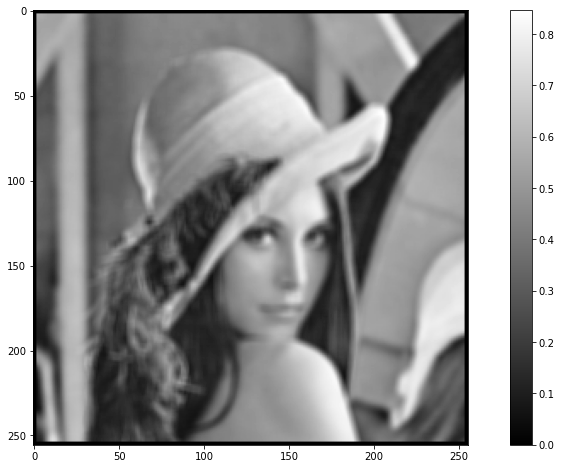

In [22]:
img = imread('data/lena_meanfilter5.png')
figure(figsize(15,8))
imshow( img,'gray' )
colorbar()

---

## Task 3.2 – Non-linear filtering

**Task 3.2.1.** Implement a median filter:

In [85]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size-1) // 2
    for p in ndindex(img.shape):
        if n <= p[0] and n <= p[1] and n + p[0] < img.shape[0] and n + p[1]< img.shape[1]:
            neighbourhood_list = []
            for q in ndindex(size, size):
                neighbourhood_list.append(img[p[0]+q[0]-n, p[1]+q[1]-n])
                
    #liste erstellen, sortieren und anwenden auf p 
            neighbourhood_list.sort()
            result[p] = neighbourhood_list[len(neighbourhood_list)//2]
    
    # write your code here
    return result

**Task 3.2.2.** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

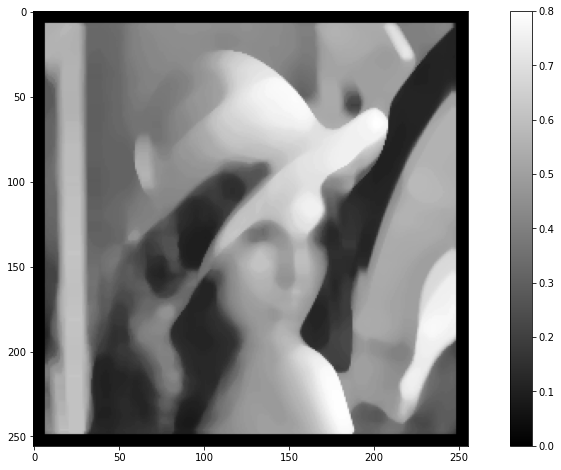

In [102]:
img3 = img.copy()
img5 = medianfilter(img3, 15)
imshow(img5, 'gray')
colorbar()

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

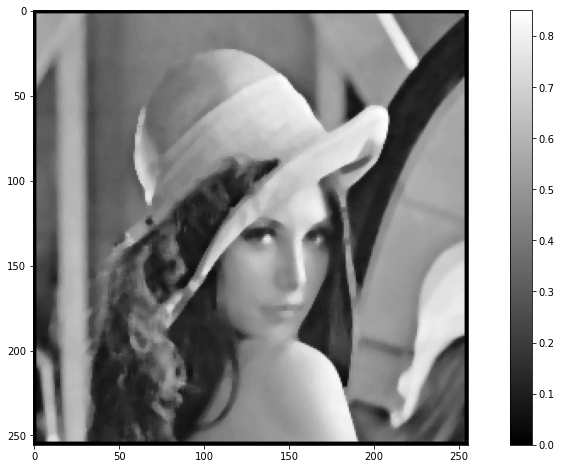

In [88]:
img = imread('data/lena_medianfilter5.png')
figure(figsize(15,8))
imshow( img,'gray' )
colorbar()

---

## Task 3.3 – Using pre-implemented filters

**Task 3.3.1.** Load the package `scipy.ndimage`:

In [89]:
import scipy.ndimage

**Task 3.3.2 (a).** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

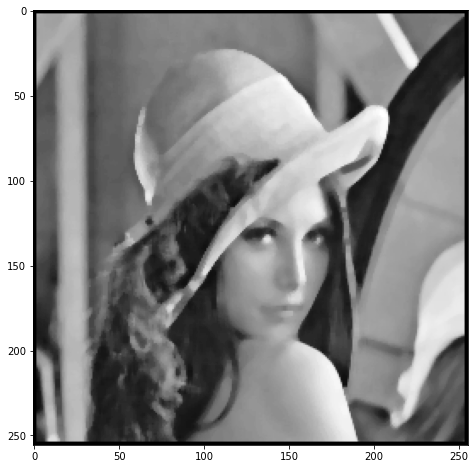

In [100]:
img6 = img.copy()
scipy.ndimage.uniform_filter(img6, 15) 
imshow(img6, 'gray')

**Task 3.3.2 (b).** Apply a **median filter** from `scipy.ndimage` to the loaded image:

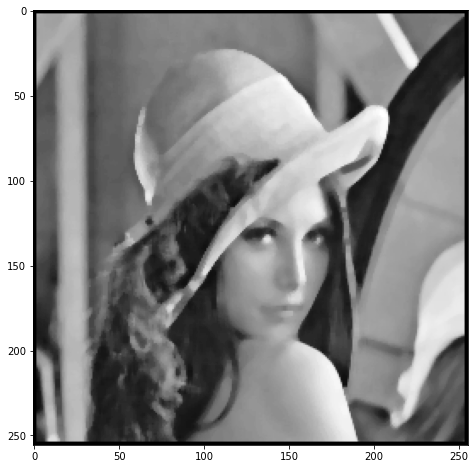

In [95]:
img7 = img.copy()
scipy.ndimage.median_filter(img7, 70)
imshow(img7, 'gray')

**Task 3.3.2 (c).** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

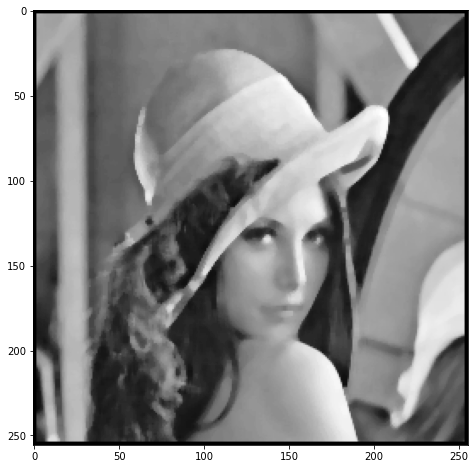

In [98]:
img8 = img.copy()
scipy.ndimage.gaussian_filter(img8, 70)
imshow(img8, 'gray')

**Task 3.3.3.** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

- die Bibliotheken gehen schneller als eigen erstellte 
- Bibliotheken machen Bild nicht schnell so unscharf 


---

## Task 3.4 – Slicing and benchmarking

**Task 3.4.2.** Implement either a mean filter or a median filter using only a single `for`-loop:

In [131]:
def fastfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size-1) // 2
    for p in ndindex(img.shape):
         if n <= p[0] and n<= p[1] and n + p[0]< img.shape[0] and n + p[1] < img.shape[1]:
                result[p] = img[p[0]-n:p[0]+n+1 ,p[1]-n:p[1]+n+1].mean()        
                
    return(result)

In [137]:
def fastfiltermd(img, size):
    result = numpy.zeros(img.shape)
    n = (size-1) // 2
    for p in ndindex(img.shape):
        if n <= p[0] and n <= p[1] and n + p[0] < img.shape[0] and n + p[1] < img.shape[1]:
            lf = flatten(img[p[0]-n:p[0]+1+n, p[1]-n:p[1]+1+n])
            result[p] = sorted(lf)[size*2//2] 
    return(result)
    # write your code here

In [148]:
def fastfiltermde(img, size):
    result = numpy.zeros(img.shape)
    n = (size-1) // 2
    for p in ndindex(img.shape):
        if n <= p[0] and n <= p[1] and n + p[0] < img.shape[0] and n + p[1] < img.shape[1]:
            result[p] = sorted(flatten(img[p[0]-n:p[0]+1+n, p[1]-n:p[1]+1+n]))[size*2//2] 
    return(result)

**Task 3.4.3.** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

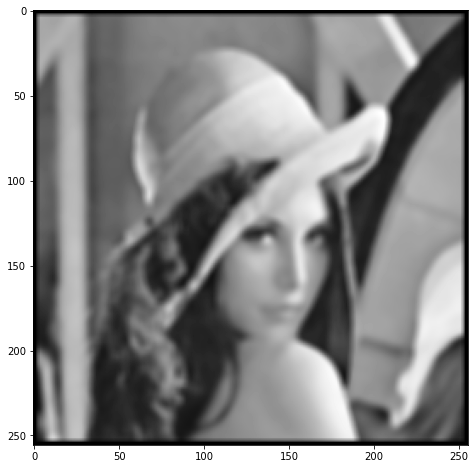

In [132]:
img10 = img.copy()
img11 = fastfilter(img10, 5)
imshow(img11, 'gray')

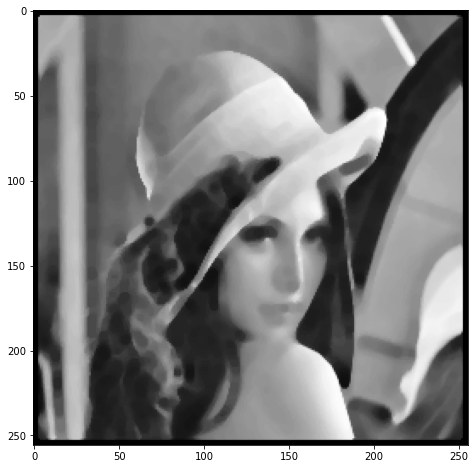

In [141]:
img12 = img.copy()
img13 = fastfiltermd(img12, 5)
imshow(img13, 'gray')

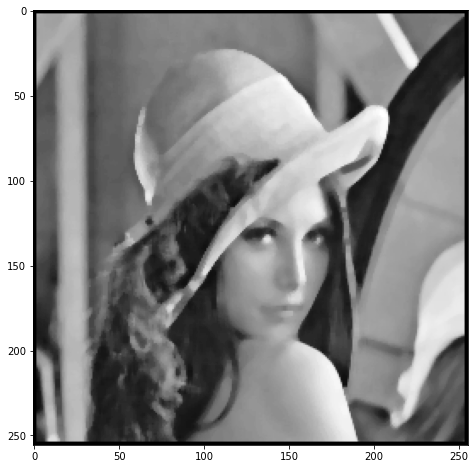

In [149]:
img14 = img.copy()
img15 = fastfiltermde(img13, 5)
imshow(img14, 'gray')

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

In [147]:
%timeit fastfilter(img10, 5)
%timeit meanfilter(img2, 5)
%timeit fastfiltermd(img12, 5)
%timeit medianfilter(img3, 5)

276 ms ± 1.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.03 s ± 2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
950 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
987 ms ± 4.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Task 3.4.4.** Benchmark the code run times:

**Task 3.4.5.** Document your observations regarding the benchmarking results and try to think of an explanation: